# <center><font color=DarkBlue>Exploratory Analysis on Chlorophyll A Concentration Data from MODIS</center>
### <center><font color=DarkRed>University of Rochester</center> <font color=DarkRed>

Research suggests that there exists a relationship between chlorophyll a concentration and coral reef bleaching. To explore that relationship, this notebook extracts chlorophyll a data from MODIS - Terra and derives multiple features that would later on be used in the bleaching model to predict bleaching severity of coral reefs. 

These same features are also created for POC (particulate organic carbon) and NFLH (normalized fluorescence line height) data as these are collected for every instance of chlorophyll a and will potentially serve as useful features for the model. Research on the relationship between POC and NFLH was not performed as part of this project but could be studied should this project be further developed in the future.

In [13]:
#!pip install geodatasets

#importing necessary libraries
import pandas as pd
from datetime import datetime
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import geodatasets
from geopandas import GeoDataFrame
from matplotlib import pyplot as plt
import warnings #used to avoid long warning about library deprication - could be removed
import seaborn as sns


   ---------------------------------------- 2/2 [geodatasets]



## GCBD (Global Coral Bleaching Database) for GBR and Caribbean

In [18]:
#importing the GCBD dataset that includes data on latitudes and longitudes for both the 
#great barrier reef and the caribbean 
dfGCBD = pd.read_csv('./GCBDMeshed.csv',index_col=0)
print(dfGCBD.columns)
dfGCBD['Date'] = pd.to_datetime(dfGCBD[['year','month','day']])
dfGCBD['Date'] = pd.to_datetime(dfGCBD['Date'])
dfGCBD = dfGCBD.dropna(subset=['Date'])

dfGCBDBlz = dfGCBD.loc[dfGCBD['lon_Rnd']>=(-100)]
dfGCBDBlz = dfGCBDBlz.loc[dfGCBDBlz['lon_Rnd'] <= (-50)]

#deriving day, month, and year from the date column
dfGCBD['day'] = dfGCBD['Date'].dt.day.astype(str).str.zfill(2)
dfGCBD['month'] = dfGCBD['Date'].dt.month.astype(str).str.zfill(2)
dfGCBD['year'] = dfGCBD['Date'].dt.year.astype(str).str.zfill(4)
dfGCBDBlz['day'] = dfGCBDBlz['Date'].dt.day.astype(str).str.zfill(2)
dfGCBDBlz['month'] = dfGCBDBlz['Date'].dt.month.astype(str).str.zfill(2)
dfGCBDBlz['year'] = dfGCBDBlz['Date'].dt.year.astype(str).str.zfill(4)
dfGCBD.head(5)
#dfGCBDBlz.head(5)

Index(['index', 'Latitude_Degrees', 'Longitude_Degrees',
       'Percent_Bleached_Sum', 'day', 'month', 'year', 'lat_Rnd', 'lon_Rnd'],
      dtype='object')


,index,Latitude_Degrees,Longitude_Degrees,Percent_Bleached_Sum,day,month,year,lat_Rnd,lon_Rnd,Date
0,0,24.366926,124.003372,75.00,08,09,2016,24.5,124.5,2016-09-08
1,1,24.454807,124.109802,75.00,02,09,2016,24.5,124.5,2016-09-02
2,2,24.463401,123.802185,32.85,05,08,2008,24.5,123.5,2008-08-05
3,3,24.482618,124.125423,75.00,02,09,2016,24.5,124.5,2016-09-02
4,4,24.483712,124.123192,75.00,01,10,2016,24.5,124.5,2016-10-01


The below plots show the distribution of GCBD data that we have on the world map.

(-20.0, 40.0)

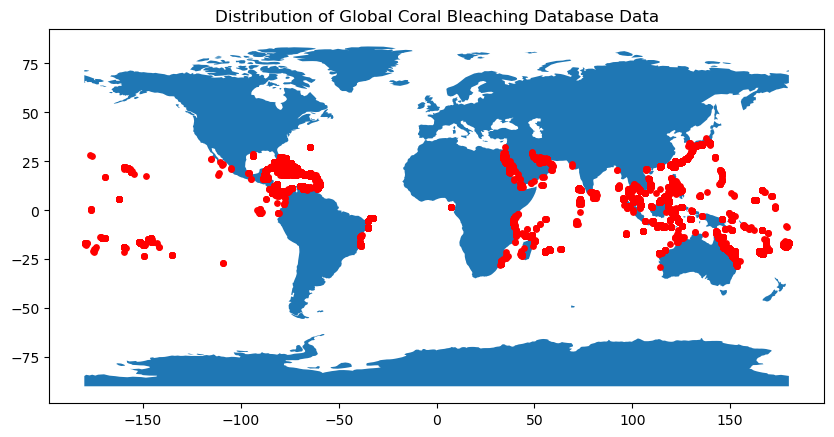

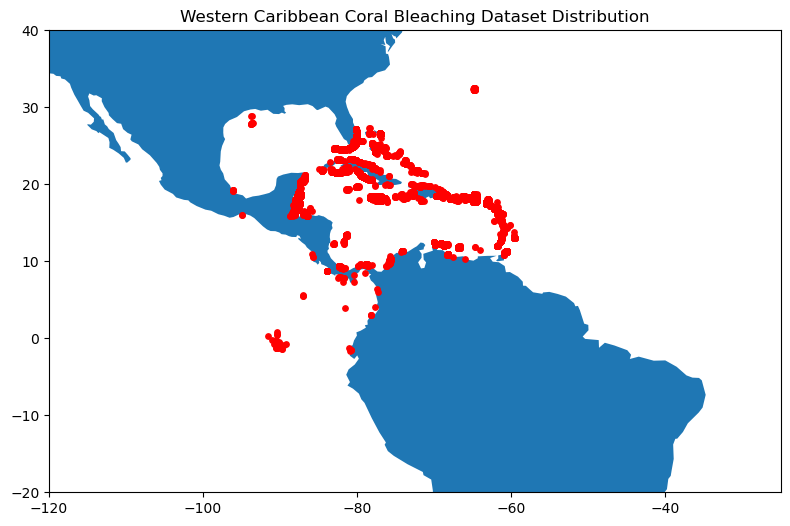

In [23]:
geometry = [Point(xy) for xy in zip(dfGCBD['Longitude_Degrees'], dfGCBD['Latitude_Degrees'])]
geoBlz = [Point(xy) for xy in zip(dfGCBDBlz['Longitude_Degrees'], dfGCBDBlz['Latitude_Degrees'])]
gdf = GeoDataFrame(dfGCBD, geometry=geometry)   
gdfBlz = GeoDataFrame(dfGCBDBlz, geometry=geoBlz)   

#this is a simple map that goes with geopandas
world = gpd.read_file(geodatasets.get_path("naturalearth land"))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.title("Distribution of Global Coral Bleaching Database Data")

gdfBlz.plot(ax=world.plot(figsize=(10,6)),marker='o', color='red', markersize=15);
plt.title('Caribbean Coral Bleaching Dataset Distribution')
plt.xlim([-120,-25])
plt.ylim([-20,40])



The GCBD data is then divided into 2: GBR and Caribbean. This is done in case certain analysis needs to be made on one region independently and will be used in later sections of this notebook.

In [24]:
#Dividing GCBD into GBR and CAR
#the numerical values for lats and longs were set manually by our team as the limits to the GBR and Caribbean
#regions that we are studying as part of this project. These could be altered. 
gcbd_gbr = dfGCBD.loc[(((dfGCBD['Longitude_Degrees']> 142.69) & (dfGCBD['Longitude_Degrees']<153.7) \
                  & (dfGCBD['Latitude_Degrees']>-28.7)&(dfGCBD['Latitude_Degrees']<-10)))]
gcbd_car = dfGCBD.loc[(dfGCBD['Longitude_Degrees']> -85) & (dfGCBD['Longitude_Degrees']<-63) &  
                      (dfGCBD['Latitude_Degrees']>17)&(dfGCBD['Latitude_Degrees']<27)]
#gbbd_car = dfGCBDBlz


Text(0.5, 1.0, 'GBR Bleaching Data Points')

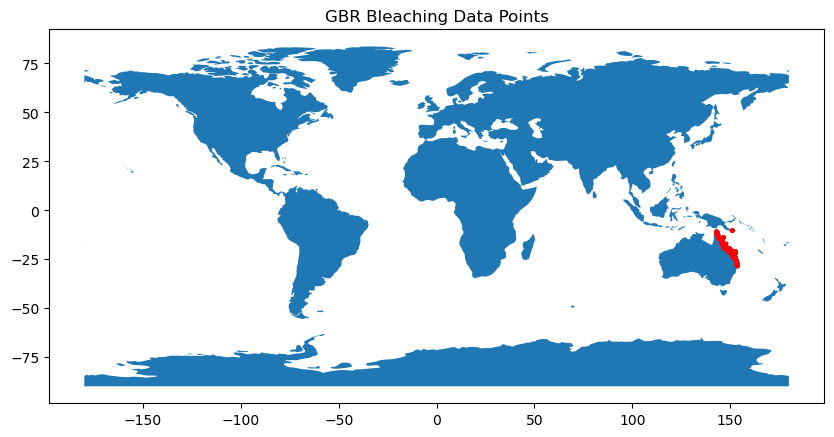

In [25]:
geometry1 = [Point(xy) for xy in zip(gcbd_gbr['Longitude_Degrees'], gcbd_gbr['Latitude_Degrees'])]
gdf1 = GeoDataFrame(gcbd_gbr, geometry=geometry1) 
gdf1.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=15)
plt.title("GBR Bleaching Data Points")

Text(0.5, 1.0, 'Caribbean Bleaching Data Points')

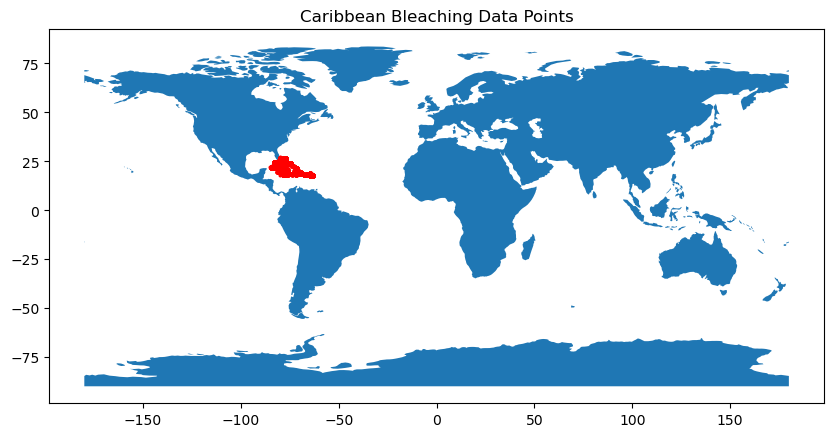

In [26]:
geometry2 = [Point(xy) for xy in zip(gcbd_car['Longitude_Degrees'], gcbd_car['Latitude_Degrees'])]
gdf2 = GeoDataFrame(gcbd_car, geometry=geometry2) 
gdf2.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=15)
plt.title("Caribbean Bleaching Data Points")

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - 

# Collecting Data from MODIS

The data is collected using the Google Earth Search Engine. Upon running the code block below, the authentication token will be needed. This requires a valid Google account. The url will materialize after running the code and should be clicked. Instructions after that are straightforward. Follow the steps promted by Google and copy paste the token into the box below.

In [27]:
# MODIS EXTRACTION
import ee
from ee import EEException
import pandas as pd
ee.Authenticate(quiet=True)
ee.Initialize()

### Row Testing:
Code below tests that the code for data collection through MODIS works. It only collects data for chlorophyll a, but this will be expanded on later on in this notebook. 

The code runs in the following fashion:
- Takes a row from the GCBD dataframe as input
- Uses the lat, long, year, month, and day from that row as collects the MODIS data for those specific values
- Returns all MODIS data at the specified lat/long for 90 days in advance of the date in GCBD dataset
- Creates a new date column

In [34]:
row = dfGCBDBlz.iloc[11]

chlor = ee.ImageCollection("NASA/OCEANDATA/MODIS-Aqua/L3SMI").select(['chlor_a'])
date = ee.Date(f"{row['year']}-{row['month']}-{row['day']}")
point = ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']])
image = chlor.filterBounds(geometry=point).filterDate(date.advance(-90, 'day'), date)
data = image.getRegion(geometry=ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']]), scale=5000).getInfo()
df = pd.DataFrame(data[1:], columns=data[0])
df['time']=df.time.apply(lambda x: datetime.fromtimestamp(x/1000))
df=df.dropna()
df['date'],df['time'] = zip(*[(d.date(), d.time()) for d in df['time']])
df

,id,longitude,latitude,time,chlor_a,date
0,A2007194,-82.173391,24.456634,17:45:02,0.090937,2007-07-12
5,A2007199,-82.173391,24.456634,18:00:02,0.107908,2007-07-17
6,A2007200,-82.173391,24.456634,17:15:01,0.115659,2007-07-18
21,A2007215,-82.173391,24.456634,18:00:02,0.243741,2007-08-02
23,A2007217,-82.173391,24.456634,17:50:02,0.136269,2007-08-04
29,A2007223,-82.173391,24.456634,17:20:02,0.230499,2007-08-10
32,A2007226,-82.173391,24.456634,17:45:02,0.424938,2007-08-13
41,A2007235,-82.173391,24.456634,17:40:01,0.125629,2007-08-22
48,A2007242,-82.173391,24.456634,17:45:00,0.128135,2007-08-29
50,A2007244,-82.173391,24.456634,17:35:01,0.315797,2007-08-31


## Collecting MODIS data for Great Barrier Reef GCBD points
### This section is more focused on testing code functionality and exploring the output 

The below code block collects chlor_a, sst (sea surface temperature), nflh, and poc data for the lats and longs found in the GBR GCBD dataframe. 

~ note that this could be generalized to collect from the comprehensive GCBD database rather than the GBR one.

In each run of the for loop, the data is being collected in the form of a dataframe for a specific long and lat found in the row in GCBD. Line 27 concats the results of the current loop to all previous ones. The output of this code is a dataframe that includes every historical data point collected for each lat/long/date (in a 90 day range). Therefore, the size of the resulting dataframe is much larger than that of GCBD since every point in GCBD has multiple readings from MODIS in the 90 day period.

In [35]:
#CODE COLLECTING MODIS DATA FOR ALL POINTS IN dfGCBD-Blz

warnings.filterwarnings('ignore')
dfk= pd.DataFrame([])
for i in range(len(dfGCBDBlz)):
    try:
        row = dfGCBDBlz.iloc[i]
        chlor = ee.ImageCollection("NASA/OCEANDATA/MODIS-Aqua/L3SMI").select(['chlor_a','sst','nflh','poc'])
        date = ee.Date(f"{row['year']}-{row['month']}-{row['day']}")
        point = ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']])
        image = chlor.filterBounds(geometry=point).filterDate(date.advance(-90, 'day'), date)
        data = image.getRegion(geometry=ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']]), scale=5000).getInfo()
        df = pd.DataFrame(data[1:], columns=data[0])
        df['time']=df.time.apply(lambda x: datetime.fromtimestamp(x/1000))
        df=df.dropna()
        
        try:
            df['date'],df['time'] = zip(*[(d.date(), d.time()) for d in df['time']]) 
        except:
            df['date'],df['time'] = np.nan, np.nan
            
    except EEException:
        df['chlor_a'] = np.nan
        df['sst'] = np.nan
        df['nflh'] = np.nan
        df['poc'] = np.nan
    dfk=pd.concat([dfk,df]) 

In [37]:
print(len(dfk))
#checking for null values collected
dfk.isna().sum()

56405


id              0
longitude       0
latitude        0
time            0
chlor_a      8830
date            0
sst          8830
nflh         8830
poc          8830
dtype: int64

In [38]:
#exporting the output dataframe as a pickle file
dfk.to_pickle('blz_chlor_data.pkl')

### The below code is a replication of the above but for the Caribbean

In [33]:
#CODE COLLECTING MODIS DATA FOR ALL POINTS IN GCBD - caribbean
import warnings
warnings.filterwarnings('ignore')
dfs= pd.DataFrame([])
for i in range(len(gcbd_car)):
    
    try:
        row = gcbd_car.iloc[i]
        chlor = ee.ImageCollection("NASA/OCEANDATA/MODIS-Aqua/L3SMI").select(['chlor_a','sst','nflh','poc'])
        date = ee.Date(f"{row['year']}-{row['month']}-{row['day']}")
        point = ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']])
        image = chlor.filterBounds(geometry=point).filterDate(date.advance(-90, 'day'), date)
        data = image.getRegion(geometry=ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']]), scale=5000).getInfo()
        df = pd.DataFrame(data[1:], columns=data[0])
        df['time']=df.time.apply(lambda x: datetime.fromtimestamp(x/1000))
        df=df.dropna()
        
        try:
            df['date'],df['time'] = zip(*[(d.date(), d.time()) for d in df['time']]) 
        except:
            df['date'],df['time'] = np.nan, np.nan
            
    except EEException:
        df['chlor_a'] = np.nan
        df['sst'] = np.nan
        df['nflh'] = np.nan
        df['poc'] = np.nan
    dfs=pd.concat([dfs,df])

EEException: ImageCollection.getRegion: No bands in collection.

In [202]:
#exporting to pickle file
dfs.to_pickle('car_chlor_data.pkl')

In [203]:
print(len(dfs))
dfs.head(5)

51387


,id,longitude,latitude,time,chlor_a,sst,nflh,poc,date
7,A2004145,-81.095412,24.636297,20:50:00,0.47221,26.775,0.04408,138.399994,2004-05-23
8,A2004146,-81.095412,24.636297,20:05:01,0.59681,26.689999,0.063715,156.0,2004-05-24
9,A2004147,-81.095412,24.636297,20:40:01,1.464179,27.705,0.04918,295.799988,2004-05-25
14,A2004152,-81.095412,24.636297,20:50:01,0.68348,27.965,0.049435,167.199997,2004-05-30
16,A2004154,-81.095412,24.636297,20:45:01,0.467872,28.555,0.05921,118.0,2004-06-01


The above dataframe shows a sample of what the code above generates. As observed, each MODIS reading has its own ID, and each lat/long combination has multiple readings across the 90 days prior to the current date (the one present in the GCBD dataset). These are all compiled into one dataframe. 

In [39]:
#reading in the pickle files created
car_chlor = pd.read_pickle('blz_chlor_data.pkl')
#gbr_chlor = pd.read_pickle('gbr_chlor_data.pkl')

The below code section combines both data files into one comprehensive dataframe that captures data from Great Barrier Reef and the Caribbean. 

In [40]:
car_chlor['date'] = pd.to_datetime(car_chlor['date'])
#gbr_chlor['date'] = pd.to_datetime(gbr_chlor['date'])
#chlor = pd.concat([car_chlor, gbr_chlor])
chlor=car_chlor.copy()
chlor

,id,longitude,latitude,time,chlor_a,date,sst,nflh,poc
0,A2007194,-82.173391,24.456634,17:45:02,NaN,2007-07-12,NaN,NaN,NaN
5,A2007199,-82.173391,24.456634,18:00:02,NaN,2007-07-17,NaN,NaN,NaN
6,A2007200,-82.173391,24.456634,17:15:01,NaN,2007-07-18,NaN,NaN,NaN
21,A2007215,-82.173391,24.456634,18:00:02,NaN,2007-08-02,NaN,NaN,NaN
23,A2007217,-82.173391,24.456634,17:50:02,NaN,2007-08-04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
55,A2013219,-78.041140,25.220202,17:40:01,0.118663,2013-08-06,29.189999,0.078165,51.599998
14,A2013178,-78.041140,25.220202,17:45:01,0.104430,2013-06-26,28.469999,0.046630,52.599998
39,A2013203,-78.041140,25.220202,17:40:01,0.159757,2013-07-21,29.180000,0.079015,55.799999
48,A2013212,-78.041140,25.220202,17:35:01,0.187653,2013-07-30,29.205000,0.060230,65.800003


In [41]:
chlor=chlor.dropna()
chlor.to_pickle('comprehensive_modis_data_NOGCBD.pkl')

## MODIS Data Analysis

This section of the notebook aims at understanding the content of the dataframe generated by collecting the data from MODIS. 

In [44]:
#checing for GCBD dataset datatypes to ensure the collected data and GCBD data are compatible for working on
dfGCBDBlz.dtypes

index                            int64
Latitude_Degrees               float64
Longitude_Degrees              float64
Percent_Bleached_Sum           float64
day                             object
month                           object
year                            object
lat_Rnd                        float64
lon_Rnd                        float64
Date                    datetime64[ns]
dtype: object

In [45]:
#checing for chlor dataset datatypes 
chlor.dtypes

id                   object
longitude           float64
latitude            float64
time                 object
chlor_a             float64
date         datetime64[ns]
sst                 float64
nflh                float64
poc                 float64
dtype: object

In [46]:
dfGCBD.head(2)

,index,Latitude_Degrees,Longitude_Degrees,Percent_Bleached_Sum,day,month,year,lat_Rnd,lon_Rnd,Date
0,0,24.366926,124.003372,75.0,08,09,2016,24.5,124.5,2016-09-08
1,1,24.454807,124.109802,75.0,02,09,2016,24.5,124.5,2016-09-02


In [47]:
chlor.head(2)

,id,longitude,latitude,time,chlor_a,date,sst,nflh,poc
7,A2004145,-81.095412,24.636297,17:50:00,0.47221,2004-05-23,26.775000,0.044080,138.399994
8,A2004146,-81.095412,24.636297,17:05:01,0.59681,2004-05-24,26.689999,0.063715,156.000000


In [48]:
#sorting both dataframes on date, lats and longs
chlor=chlor.sort_values(by=['date','latitude','longitude'])
dfGCBD=dfGCBDBlz.sort_values(by=['Date','Latitude_Degrees','Longitude_Degrees'])

In [49]:
#getting the date range found in GCBD
print(dfGCBDBlz.Date.min())
print(dfGCBDBlz.Date.max())

1983-01-15 00:00:00
2019-10-18 00:00:00


In [50]:
#getting the date range found in chlor
print(chlor.date.min())
print(chlor.date.max())

2002-11-14 00:00:00
2019-09-25 00:00:00


Now, to illustrate changes in poc, nflh, and chlor_a, a single lat/long point is selected. 

The dataframe is grouped by latitude and longitude in order to find a point that has many readings through MODIS. 

In [51]:
pop=chlor.groupby(['latitude','longitude']).count().reset_index()
pop

,latitude,longitude,id,time,chlor_a,date,sst,nflh,poc
0,8.691200,-83.880190,16,16,16,16,16,16,16
1,8.736116,-83.880190,100,100,100,100,100,100,100
2,9.095442,-81.814065,1,1,1,1,1,1,1
3,9.095442,-81.544570,4,4,4,4,4,4,4
4,9.364937,-76.244510,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
730,32.451640,-64.790990,7,7,7,7,7,7,7
731,32.451640,-64.746074,10,10,10,10,10,10,10
732,32.496555,-64.790990,9,9,9,9,9,9,9
733,32.496555,-64.746074,12,12,12,12,12,12,12


In [56]:
#This is a filtering technique to narrow down to the one point found on index three of the above dataframe
df_sample=chlor[(chlor['longitude']>=-83.9) & (chlor['longitude']<-82.8) & (chlor['latitude']>=20.10909) & (chlor['latitude']<21.810905)]
df_sample=df_sample.sort_values(by='date')
df_sample['date']=df_sample['date'].astype(str)
df_sample

,id,longitude,latitude,time,chlor_a,date,sst,nflh,poc
2,A2005047,-83.341200,21.716772,17:45:01,0.137613,2005-02-15,25.754999,-0.007260,47.200001
2,A2005047,-83.206453,21.716772,17:45:01,0.549941,2005-02-15,25.445000,-0.048740,129.399994
2,A2005047,-83.206453,21.716772,17:45:01,0.549941,2005-02-15,25.445000,-0.048740,129.399994
3,A2005048,-83.341200,21.716772,17:25:01,0.135867,2005-02-16,25.939999,-0.015250,47.799999
3,A2005048,-83.206453,21.716772,17:25:01,2.011595,2005-02-16,25.510000,0.023765,296.799988
...,...,...,...,...,...,...,...,...,...
71,A2007208,-83.206453,21.671856,17:55:01,1.582376,2007-07-26,30.949999,0.065245,321.399994
78,A2007215,-83.206453,21.671856,18:00:02,3.628056,2007-08-02,31.764999,0.021640,467.799988
4,A2009172,-83.206453,21.626940,18:00:00,2.047427,2009-06-20,31.320000,0.033625,312.600006
20,A2009188,-83.206453,21.626940,18:00:01,3.336635,2009-07-06,30.709999,0.094995,463.000000


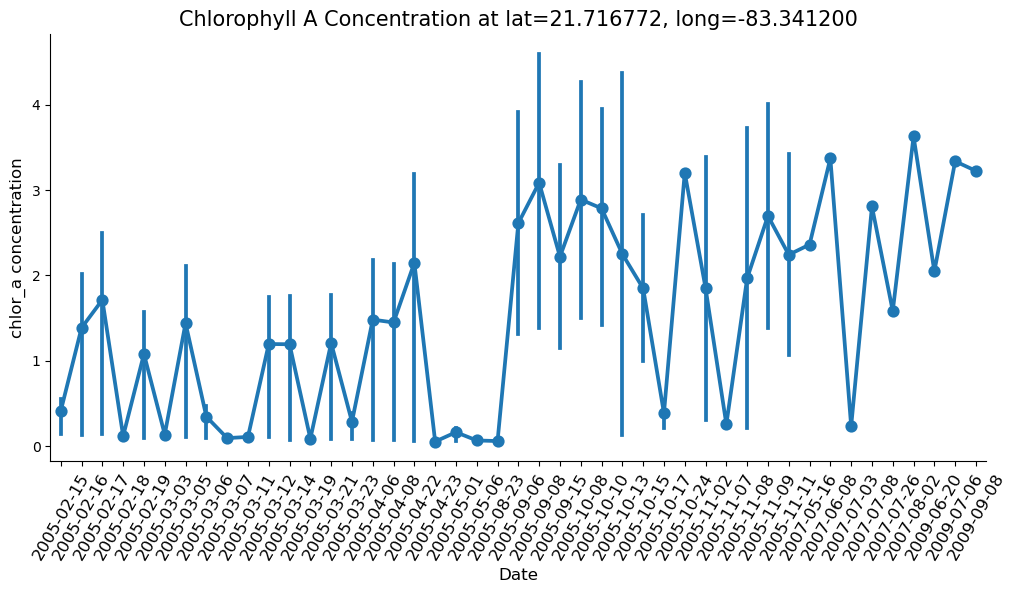

In [59]:
sns.catplot(x = 'date', y = 'chlor_a', data = df_sample,height=5, aspect=2, kind='point')
plt.xlabel("Date", fontsize=12)
plt.ylabel("chlor_a concentration", fontsize=12)
plt.title("Chlorophyll A Concentration at lat=21.716772, long=-83.341200", fontsize=15)
plt.xticks(rotation = 60, fontsize=12)

plt.show()

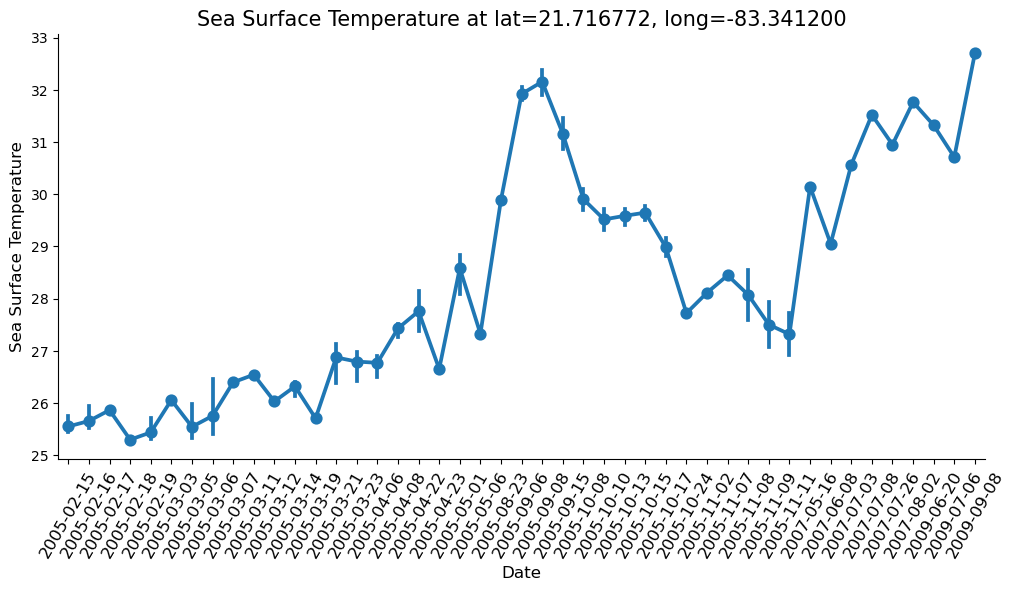

In [60]:
sns.catplot(x = 'date', y = 'sst', data = df_sample,height=5, aspect=2, kind='point')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sea Surface Temperature", fontsize=12)
plt.title("Sea Surface Temperature at lat=21.716772, long=-83.341200", fontsize=15)
plt.xticks(rotation = 60, fontsize=12)

plt.show()

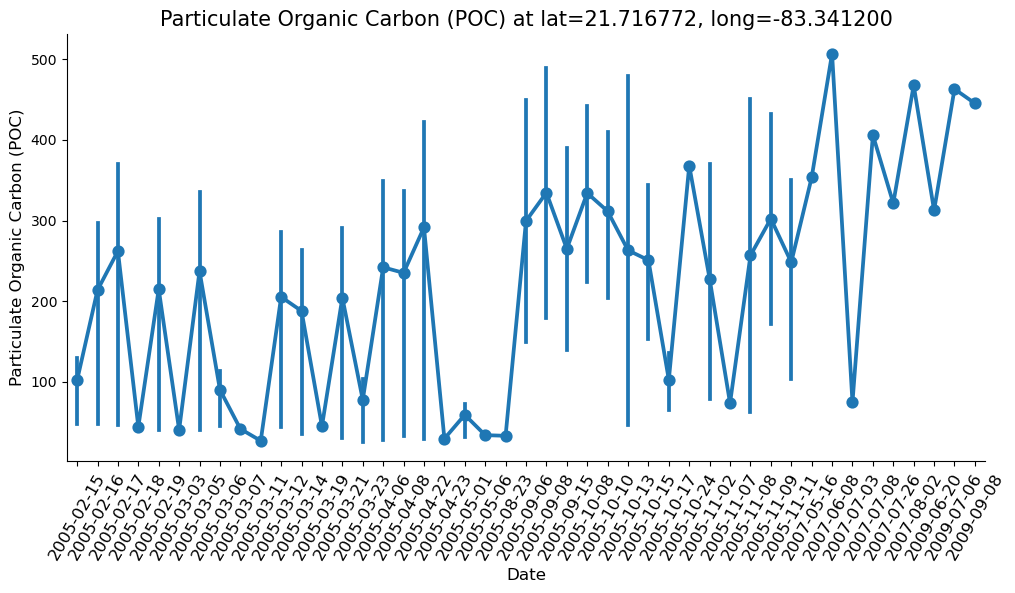

In [61]:
sns.catplot(x = 'date', y = 'poc', data = df_sample,height=5, aspect=2, kind='point')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Particulate Organic Carbon (POC)", fontsize=12)
plt.title("Particulate Organic Carbon (POC) at lat=21.716772, long=-83.341200", fontsize=15)
plt.xticks(rotation = 60, fontsize=12)

plt.show()

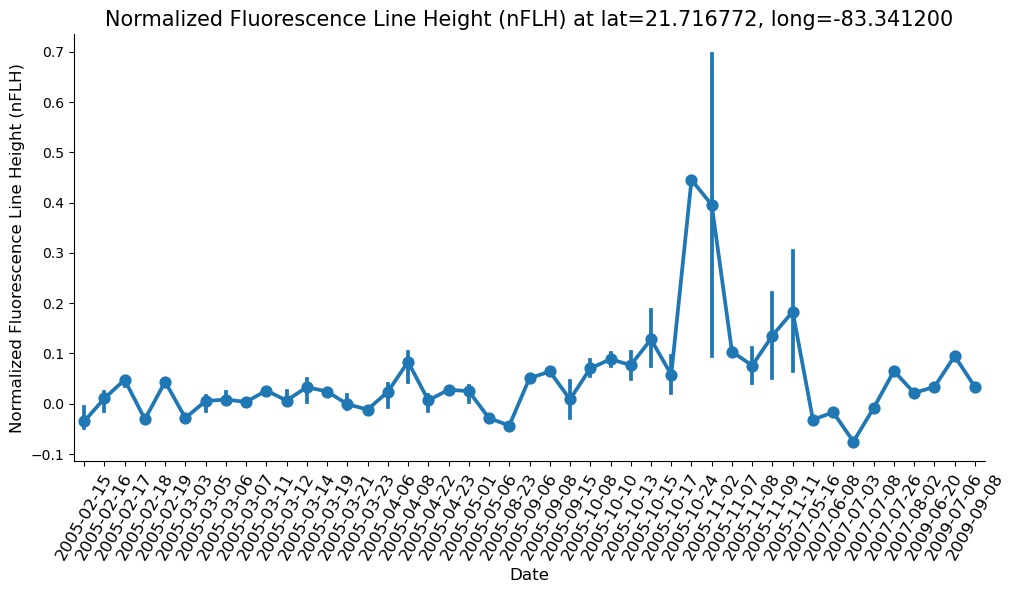

In [62]:
sns.catplot(x = 'date', y = 'nflh', data = df_sample,height=5, aspect=2, kind='point')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Fluorescence Line Height (nFLH)", fontsize=12)
plt.title("Normalized Fluorescence Line Height (nFLH) at lat=21.716772, long=-83.341200", fontsize=15)
plt.xticks(rotation = 60, fontsize=12)

plt.show()

In [63]:
temp=pd.DataFrame(chlor.groupby(['latitude','longitude'])['chlor_a'].mean())

(array([615.,  65.,  38.,   8.,   4.,   2.,   1.,   0.,   1.,   1.]),
 array([0.04990074, 0.909569  , 1.76923726, 2.62890552, 3.48857377,
        4.34824203, 5.20791029, 6.06757855, 6.9272468 , 7.78691506,
        8.64658332]),
 <BarContainer object of 10 artists>)

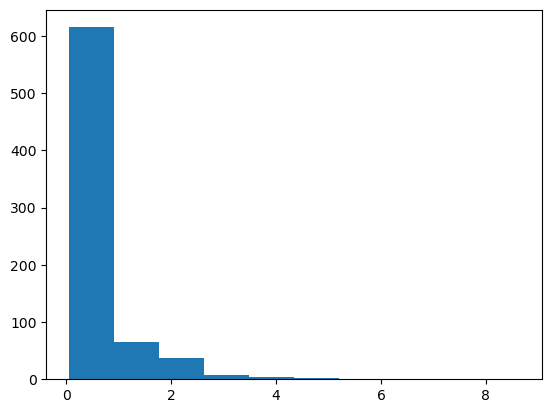

In [64]:
counts, bins = np.histogram(temp)
plt.hist(bins[:-1], bins, weights=counts)

# Feature Engineering on MODIS Data

In this section, we study different features that could be derived from chlor_a, poc, and nflh and could be of added value to our predictive model. SST features are analyzed in a separate notebook.

### Row Testing:
Code below tests that the code for data collection through MODIS works. It collects the data from MODIS for chlor_a, poc, and nflh.

The code runs in the following fashion:
- Takes a row from the GCBD dataframe as input
- Uses the lat, long, year, month, and day from that row as collects the MODIS data for those specific values
- Returns all MODIS data at the specified lat/long for 90 days in advance of the date in GCBD dataset
- Creates a new date column

Below is an explanation of each new column created and its use:
- change: returns number of days between the first and last observation in the 90-day period window
- chlor_avg, poc_avg, nflh_avg: return the average of chlor_a, poc, and nflh respectively for all the observations on the specified lat/long
- chlor_max, poc_max, nflh_max: return the maximum value of chlor_a, poc, and nflh respectively across all the observations on the specified lat/long
- chlor_min, poc_min, nflh_min: return the minimum value of chlor_a, poc, and nflh respectively across all the observations on the specified lat/long
- tot_days: returns the number of days between first and last observation (it is the stripped version of the change column)
- chlor_change, poc_change, nflh_change: return the change observed in chlor_a, poc, and nflh values respectively between the first and last reading

The above generated features help derive insight into the conditions of the reefs at the latitude and longitude at every point in the GCBD. 

In [74]:
row = dfGCBDBlz.iloc[1398]

chlor = ee.ImageCollection("NASA/OCEANDATA/MODIS-Aqua/L3SMI").select(['chlor_a','nflh','poc'])
date = ee.Date(f"{row['year']}-{row['month']}-{row['day']}")
point = ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']])
image = chlor.filterBounds(geometry=point).filterDate(date.advance(-45, 'day'), date)
data = image.getRegion(geometry=ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']]), scale=5000).getInfo()
df = pd.DataFrame(data[1:], columns=data[0])

df['time']=df.time.apply(lambda x: datetime.fromtimestamp(x/1000))
df=df.dropna()

try:
    df['date'],df['time'] = zip(*[(d.date(), d.time()) for d in df['time']]) 
except:
    df['date'],df['time'] = np.nan, np.nan

df['change'] = df.date - df.date.shift(1)
print(df.change)

df['chlor_avg']=np.mean(df['chlor_a'])
df['nflh_avg']=np.mean(df['nflh'])
df['poc_avg']=np.mean(df['poc'])
df['chlor_max']=np.max(df['chlor_a'])
df['nflh_max']=np.max(df['nflh'])
df['poc_max']=np.max(df['poc'])
df['chlor_min']=np.min(df['chlor_a'])
df['nflh_min']=np.min(df['nflh'])
df['poc_min']=np.min(df['poc'])
df['tot_days'] = (df['date'].max() - df['date'].min()).days
df['chlor_change']=float(df['chlor_a'][-1:])-float(df['chlor_a'][:1])
df['nflh_change']=float(df['nflh'][-1:])-float(df['nflh'][:1])
df['poc_change']=float(df['poc'][-1:])-float(df['poc'][:1])


5                  NaN
6       1 day, 0:00:00
13     7 days, 0:00:00
14      1 day, 0:00:00
44    30 days, 0:00:00
Name: change, dtype: object


In [75]:
df

,id,longitude,latitude,time,chlor_a,nflh,poc,date,change,chlor_avg,...,chlor_max,nflh_max,poc_max,chlor_min,nflh_min,poc_min,tot_days,chlor_change,nflh_change,poc_change
5,A2008220,-80.152181,25.265117,17:50:00,0.160757,0.018155,56.400002,2008-08-06,NaN,0.243335,...,0.482444,0.042465,132.199997,0.13443,-0.051035,50.799999,39,0.025329,-0.014875,10.400002
6,A2008221,-80.152181,25.265117,17:05:01,0.134430,0.042465,50.799999,2008-08-07,"1 day, 0:00:00",0.243335,...,0.482444,0.042465,132.199997,0.13443,-0.051035,50.799999,39,0.025329,-0.014875,10.400002
13,A2008228,-80.152181,25.265117,17:10:01,0.252957,0.038810,70.400002,2008-08-14,"7 days, 0:00:00",0.243335,...,0.482444,0.042465,132.199997,0.13443,-0.051035,50.799999,39,0.025329,-0.014875,10.400002
14,A2008229,-80.152181,25.265117,17:45:01,0.482444,-0.051035,132.199997,2008-08-15,"1 day, 0:00:00",0.243335,...,0.482444,0.042465,132.199997,0.13443,-0.051035,50.799999,39,0.025329,-0.014875,10.400002
44,A2008259,-80.152181,25.265117,17:30:01,0.186086,0.003280,66.800003,2008-09-14,"30 days, 0:00:00",0.243335,...,0.482444,0.042465,132.199997,0.13443,-0.051035,50.799999,39,0.025329,-0.014875,10.400002


### Data Collection Function

This code incorporates the above into a function that performs all the calculations and returns the output. For each row in the GCB Dataset, the features (explained above) are calculated and returned. Unlike the code in the previous section that concatenates all readings for each GCBD point, this one only returns one row for each GCBD instance. This leads to the chlor_a, poc_ and nflh columns in this output being irrelevant as they are reflective of only one data point from MODIS and therefore we will delete these from the output dataframe. 

In [78]:
def getModisData(row):
    import warnings
    warnings.filterwarnings('ignore')

    try:
        #if(row.index % 250 == 0):
        #    print("Row:",row.index)
        chlor = ee.ImageCollection("NASA/OCEANDATA/MODIS-Aqua/L3SMI").select(['chlor_a', 'nflh','poc'])
        date = ee.Date(f"{row['year']}-{row['month']}-{row['day']}")
        point = ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']])
        image = chlor.filterBounds(geometry=point).filterDate(date.advance(-30, 'day'), date)
        data = image.getRegion(geometry=ee.Geometry.Point([row['Longitude_Degrees'], row['Latitude_Degrees']]), scale=5000).getInfo()
        df = pd.DataFrame(data[1:], columns=data[0])
        
        df['time']=df.time.apply(lambda x: datetime.fromtimestamp(x/1000))
        df=df.dropna()

        try:
            df['date'],df['time'] = zip(*[(d.date(), d.time()) for d in df['time']]) 
        except:
            df['date'],df['time'] = np.nan, np.nan
            
        
        if df.shape[0]==0:
            row['chlor_avg'] = np.nan
            row['nflh_avg'] = np.nan
            row['poc_avg'] = np.nan
            row['chlor_min'] = np.nan
            row['nflh_min'] = np.nan
            row['poc_min'] = np.nan
            row['chlor_max'] = np.nan
            row['nflh_max'] = np.nan
            row['poc_max'] = np.nan
            row['poc_change'] = np.nan
            row['chlor_change'] = np.nan
            row['nflh_change'] = np.nan
            row['time_span'] = np.nan
        elif df.shape[0] >= 1:
            
            df['change'] = df.date - df.date.shift(1)
            df['chlor_avg']=np.mean(df['chlor_a'])
            df['nflh_avg']=np.mean(df['nflh'])
            df['poc_avg']=np.mean(df['poc'])
            df['chlor_max']=np.max(df['chlor_a'])
            df['nflh_max']=np.max(df['nflh'])
            df['poc_max']=np.max(df['poc'])
            df['chlor_min']=np.min(df['chlor_a'])
            df['nflh_min']=np.min(df['nflh'])
            df['poc_min']=np.min(df['poc'])
            df['tot_days'] = (df['date'].max() - df['date'].min()).days
            df['chlor_change']=float(df['chlor_a'][-1:])-float(df['chlor_a'][:1])
            df['nflh_change']=float(df['nflh'][-1:])-float(df['nflh'][:1])
            df['poc_change']=float(df['poc'][-1:])-float(df['poc'][:1])
            row['chlor_avg'] = df.iloc[0,]['chlor_avg']
            row['nflh_avg'] = df.iloc[0,]['nflh_avg']
            row['poc_avg'] = df.iloc[0,]['poc_avg']
            row['chlor_min'] = df.iloc[0,]['chlor_min']
            row['nflh_min'] = df.iloc[0,]['nflh_min']
            row['poc_min'] = df.iloc[0,]['poc_min']
            row['chlor_max'] = df.iloc[0,]['chlor_min']
            row['nflh_max'] = df.iloc[0,]['nflh_max']
            row['poc_max'] = df.iloc[0,]['poc_max']
            row['poc_change'] = df.iloc[0,]['poc_change']
            row['chlor_change'] = df.iloc[0,]['chlor_change']
            row['nflh_change'] = df.iloc[0,]['nflh_change']
            row['time_span'] = df.iloc[0,]['tot_days']
            
        return row
    except EEException:
        row['chlor_a'] = np.nan
        row['nflh'] = np.nan
        row['poc'] = np.nan
        return row

### Data Collection & Cleaning

In [79]:
import time
st = time.time()

dfGCBDModis = dfGCBDBlz.apply(getModisData,axis=1)

et = time.time()

elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 2074.1365411281586 seconds


In [80]:
dfGCBDModis

,Date,Latitude_Degrees,Longitude_Degrees,Percent_Bleached_Sum,chlor_a,chlor_avg,chlor_change,chlor_max,chlor_min,day,...,nflh_change,nflh_max,nflh_min,poc,poc_avg,poc_change,poc_max,poc_min,time_span,year
345,1997-08-15,24.638000,-82.862000,75.0,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
346,1997-08-15,25.012000,-80.376000,75.0,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
366,1998-08-15,24.638000,-82.862000,75.0,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
367,1998-08-15,25.012000,-80.376000,75.0,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
374,2004-08-15,24.627000,-81.110000,17.5,NaN,1.353813,0.934574,0.833821,0.833821,15,...,0.231625,0.30044,0.068815,NaN,246.799998,106.199997,303.399994,197.199997,8.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,2015-03-18,12.028167,-61.783111,0.0,NaN,NaN,NaN,NaN,NaN,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
22951,2015-03-26,12.045639,-61.764917,0.0,NaN,NaN,NaN,NaN,NaN,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
22952,2015-03-26,12.045639,-61.764917,0.0,NaN,NaN,NaN,NaN,NaN,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
22953,2015-03-11,12.041444,-61.770944,0.0,NaN,NaN,NaN,NaN,NaN,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


Below, we try to understand what data types we have collected, what data is missing, and save the final output into a datarame. 

In [82]:
dfGCBDModis.isna().sum()
#we can see that there are 2757 points in GCBD that do not have corresponding points collected through MODIS

Date                        0
Latitude_Degrees            0
Longitude_Degrees           0
Percent_Bleached_Sum        0
chlor_a                 11131
chlor_avg                5786
chlor_change             5786
chlor_max                5786
chlor_min                5786
day                         0
index                       0
lat_Rnd                     0
lon_Rnd                     0
month                       0
nflh                    11131
nflh_avg                 5786
nflh_change              5786
nflh_max                 5786
nflh_min                 5786
poc                     11131
poc_avg                  5786
poc_change               5786
poc_max                  5786
poc_min                  5786
time_span                5786
year                        0
dtype: int64

In [83]:
dfGCBDModis.dtypes

Date                    datetime64[ns]
Latitude_Degrees               float64
Longitude_Degrees              float64
Percent_Bleached_Sum           float64
chlor_a                        float64
chlor_avg                      float64
chlor_change                   float64
chlor_max                      float64
chlor_min                      float64
day                             object
index                            int64
lat_Rnd                        float64
lon_Rnd                        float64
month                           object
nflh                           float64
nflh_avg                       float64
nflh_change                    float64
nflh_max                       float64
nflh_min                       float64
poc                            float64
poc_avg                        float64
poc_change                     float64
poc_max                        float64
poc_min                        float64
time_span                      float64
year                     

In [84]:
#dropping irrelevant columns and nulls
df_update = dfGCBDModis.drop(columns=['chlor_a','nflh','poc'])
df_update.isna().sum()
df_update=df_update.dropna()
df_update.isna().sum()

Date                    0
Latitude_Degrees        0
Longitude_Degrees       0
Percent_Bleached_Sum    0
chlor_avg               0
chlor_change            0
chlor_max               0
chlor_min               0
day                     0
index                   0
lat_Rnd                 0
lon_Rnd                 0
month                   0
nflh_avg                0
nflh_change             0
nflh_max                0
nflh_min                0
poc_avg                 0
poc_change              0
poc_max                 0
poc_min                 0
time_span               0
year                    0
dtype: int64

In [102]:
#df_update
df_update.to_pickle('dfGCBDModisFinal.pkl')
#exporting the final dataframe into a pickle file
dfGCBDModis=pd.read_pickle('dfGCBDModisFinal.pkl')

## Exploratory Analysis of Final GCBD-MODIS Data

The aim of exploring the data is to underdstand if there truly exists a correlation or relationship between poc, nflh, poc, and coral reef bleaching. 

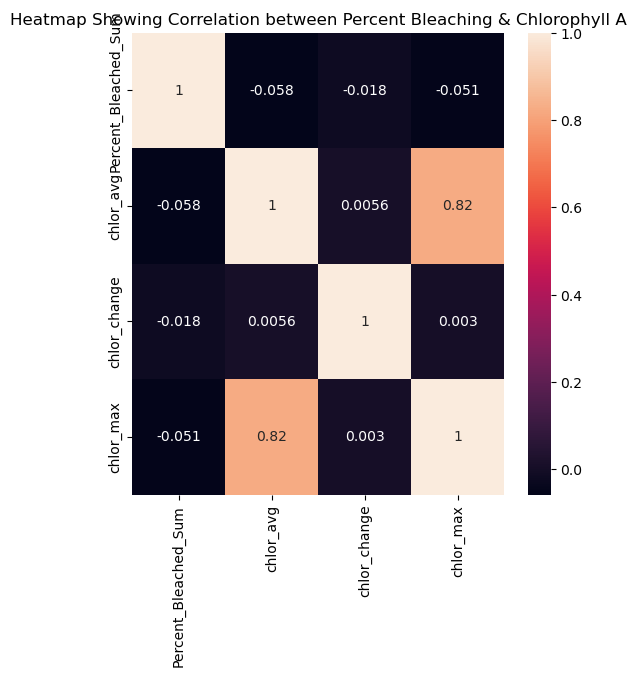

In [103]:
dfx=df_update[["Percent_Bleached_Sum", "chlor_avg","chlor_change", "chlor_max"]]
plt.figure(figsize=(6, 6))
sns.heatmap(dfx.corr(), annot=True)
plt.title("Heatmap Showing Correlation between Percent Bleaching & Chlorophyll A")
plt.show()

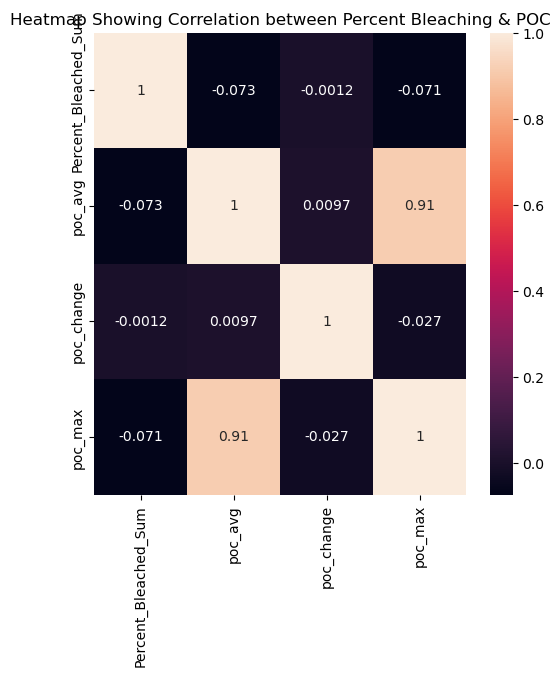

In [104]:
dfx=df_update[["Percent_Bleached_Sum", "poc_avg","poc_change", "poc_max"]]
plt.figure(figsize=(6, 6))
sns.heatmap(dfx.corr(), annot=True)
plt.title("Heatmap Showing Correlation between Percent Bleaching & POC")
plt.show()

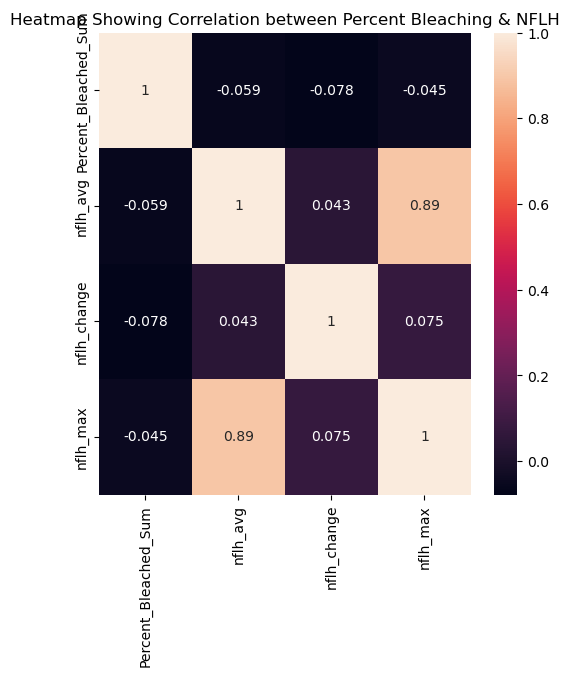

In [105]:
dfx=df_update[["Percent_Bleached_Sum", "nflh_avg","nflh_change", "nflh_max"]]
plt.figure(figsize=(6, 6))
sns.heatmap(dfx.corr(), annot=True)
plt.title("Heatmap Showing Correlation between Percent Bleaching & NFLH")
plt.show()

The below is code to perform exploratory analysis on one point in the GCB dataset. The point is selected by specifying the latitude and longitude (in this case only lat is specified since it has only one long degree. If this code is to be reproduced, a longitude should be specified and added as a constraint in the following cell.

In [139]:
# #This is a filtering technique to narrow down to the one point found on index three of the above dataframe
dfGCBDModis[['day', 'month', 'year']] = dfGCBDModis[['day', 'month', 'year']].astype(str)
cols=["year","month","day"]
dfGCBDModis['Date'] = dfGCBDModis[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dfGCBDModis['Date'] = pd.to_datetime(dfGCBDModis['Date'])
print(dfGCBDModis['Latitude_Degrees'].value_counts())
df_sample1=dfGCBDModis[dfGCBDModis['Latitude_Degrees']==18.70700]
print(df_sample1['Date'])

Latitude_Degrees
18.70700    33
18.72400    29
17.77400    29
18.72000    28
18.70400    26
            ..
24.66065     1
24.66093     1
24.45467     1
24.45523     1
24.45534     1
Name: count, Length: 3211, dtype: int64
17088   2005-05-15
17089   2005-05-15
17090   2005-05-15
17091   2005-05-15
17098   2005-12-15
17099   2005-12-15
17100   2005-12-15
17101   2005-12-15
17102   2005-12-15
17108   2005-05-15
17109   2005-05-15
17110   2005-05-15
17111   2005-05-15
17112   2005-05-15
17118   2005-11-15
17119   2005-11-15
17120   2005-11-15
17121   2005-11-15
17122   2005-11-15
17445   2005-05-15
17446   2005-05-15
17453   2005-11-15
17454   2005-11-15
17455   2005-11-15
17456   2005-11-15
17457   2005-11-15
17544   2005-05-15
17545   2005-05-15
17552   2005-11-15
17553   2005-11-15
17554   2005-11-15
17555   2005-11-15
17556   2005-11-15
Name: Date, dtype: datetime64[ns]


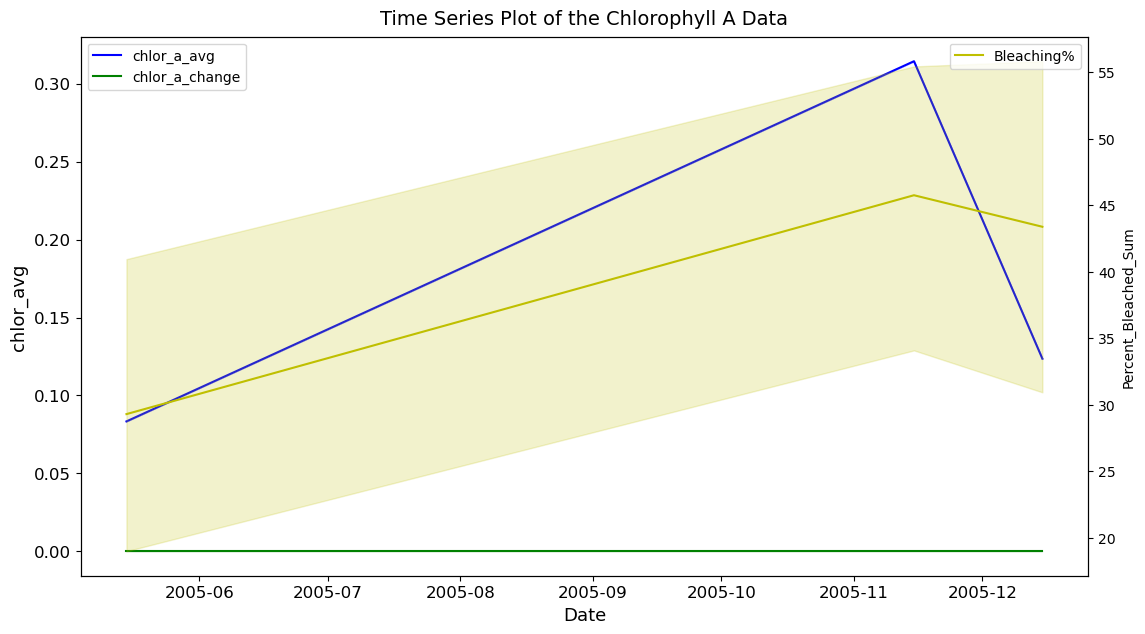

In [137]:
#plotting the time series data
fig=plt.figure(figsize = (13,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=13)
plt.ylabel('chlor_avg',fontsize=13)
sns.lineplot(x = 'Date', y = "chlor_avg",data = df_sample1,color='blue',label="chlor_a_avg")
sns.lineplot(x = 'Date', y = "chlor_change",data = df_sample1,color='green',label="chlor_a_change")
ax2 = plt.twinx()
sns.lineplot(x = 'Date', y = "Percent_Bleached_Sum",data=df_sample1, color="y", ax=ax2,label="Bleaching%")
plt.title("Time Series Plot of the Chlorophyll A Data", 
          size=14, verticalalignment='bottom')
ax2.legend (loc="upper right")
plt.show()